## WMT analysis

#### Following [full3D_tutorial.ipynb](https://github.com/hdrake/xwmt/blob/main/examples/full3D_tutorial.ipynb) 

In [1]:
import xarray as xr
import numpy as np

import xwmb
import xwmt
import xgcm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [1]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
ds = xr.open_mfdataset(f"{hfdrake_path}/data/WMT_monthly/ocean_month_rho2.0186*", chunks={"xh":360, "yh":270, "time":1}) #chunks={'time':1})

NameError: name 'xr' is not defined

In [ ]:
snap = xr.open_mfdataset(f"{hfdrake_path}/data/WMT_monthly/ocean_month_rho2_snap.0186*", chunks={"xh":360, "yh":270, "time":1}) #chunks={'time':1})

In [2]:
static = xr.open_mfdataset(f"{hfdrake_path}/data/WMT_monthly/ocean_month_rho2.static.nc", chunks={"xh":360, "yh":270}) #chunks={'time':1})

NameError: name 'xr' is not defined

In [8]:
#wmt_calc = xr.open_dataset('/pub/mariant3/VeryWarmWaterMasses/WMT_analysis/wmt.nc')

In [9]:
# Merge snapshots with time-averages
snap = snap.rename({
    **{'time':'time_bounds'},
    **{v:f"{v}_bounds" for v in snap.data_vars}
})
ds = xr.merge([ds.sel(time=ds.time[1:]), snap])

In [15]:
ds

<xarray.Dataset>
Dimensions:                         (time: 59, rho2_l: 74, yh: 1080, xh: 1440,
                                     nv: 2, rho2_i: 75, yq: 1080,
                                     time_bounds: 60, xq: 1440)
Coordinates: (12/17)
  * nv                              (nv) float64 1.0 2.0
  * rho2_i                          (rho2_i) float64 997.0 ... 1.039e+03
  * rho2_l                          (rho2_l) float64 1.004e+03 ... 1.038e+03
  * time                            (time) object 0186-02-15 00:00:00 ... 019...
  * xh                              (xh) float64 -299.7 -299.5 ... 59.78 60.03
  * yh                              (yh) float64 -80.39 -80.31 ... 89.84 89.95
    ...                              ...
  * yq                              (yq) float64 -80.35 -80.27 ... 89.89 90.0
    deptho                          (yh, xh) float32 nan nan nan ... nan nan nan
    geolon                          (yh, xh) float32 -299.7 -299.5 ... 60.0 60.0
    geolat                          (yh, xh) float32 -79.81 -79.81 ... 64.11
    geolon_c                        (yq, xq) float32 -299.6 -299.4 ... -300.0
    geolat_c                        (yq, xq) float32 -79.77 -79.77 ... 64.06
Data variables: (12/36)
    S_advection_xy                  (time, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    average_DT                      (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1                      (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2                      (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds                       (time, nv) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    Sh_tendency_vert_remap          (time, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    ...                              ...
    so_bounds                       (time_bounds, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    thetao_bounds                   (time_bounds, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    thkcello_bounds                 (time_bounds, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    volcello_bounds                 (time_bounds, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    tos                             (time, yh, xh) float32 dask.array<chunksize=(1, 270, 360), meta=np.ndarray>
    sos                             (time, yh, xh) float32 dask.array<chunksize=(1, 270, 360), meta=np.ndarray>
Attributes:
    filename:            ocean_month_rho2.018601-019012.S_advection_xy.nc
    title:               CM4_piControl_C_restartyear148
    associated_files:    areacello: 01860101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello

In [10]:
# Add core coordinates of static to ds
ds = ds.assign_coords({
    "areacello": xr.DataArray(static["areacello"].values, dims=('yh', 'xh',)), # Required for area-integration
    "lon": xr.DataArray(static["geolon"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
    "lat": xr.DataArray(static["geolat"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
    "xq": xr.DataArray(static["xq"].values, dims=('xq',)),
    "yq": xr.DataArray(static["yq"].values, dims=('yq',)),
    "deptho": xr.DataArray(static["deptho"].values, dims=('yh', 'xh',)),
    "geolon": xr.DataArray(static["geolon"].values, dims=('yh', 'xh',)),
    "geolat": xr.DataArray(static["geolat"].values, dims=('yh', 'xh',)),
    "geolon_c": xr.DataArray(static["geolon_c"].values, dims=('yq', 'xq',)),
    "geolat_c": xr.DataArray(static["geolat_c"].values, dims=('yq', 'xq',)),
})

# xgcm grid for dataset
coords = {
    'X': {'center': 'xh', 'right': 'xq'},
    'Y': {'center': 'yh', 'right': 'yq'},
    'Z': {'center': 'rho2_l', 'outer': 'rho2_i'}
}
metrics = {
    ('X','Y'): "areacello", # Required for area-integration
}

ds['tos'] = ds['thetao'].isel(rho2_l=0)
ds['sos'] = ds['so'].isel(rho2_l=0)

grid = xgcm.Grid(ds.copy(), coords=coords, metrics=metrics, boundary={'X':'extend', 'Y':'extend', 'Z':'extend'}, autoparse_metadata=False)

In [10]:
wm = xwmt.WaterMass(grid)

In [11]:
grid

<xgcm.Grid>
X Axis (not periodic, boundary='extend'):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic, boundary='extend'):
  * center   yh --> right
  * right    yq --> center
Z Axis (not periodic, boundary='extend'):
  * center   rho2_l --> outer
  * outer    rho2_i --> center

In [12]:
import xbudget
budgets_dict = xbudget.load_preset_budget(model="MOM6_3Donly")
xbudget.collect_budgets(grid._ds, budgets_dict)

(10.0, 38.0)

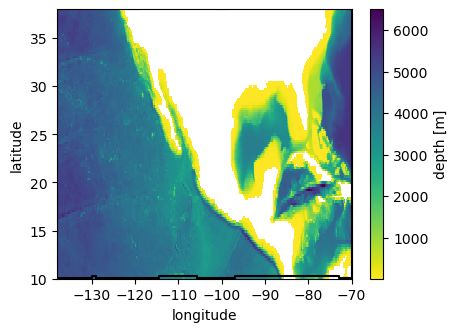

In [13]:
import numpy as np
import regionate
import matplotlib.pyplot as plt

# Note: the properties of this region are quite different from the rest of the Baltic!
name = "MANSO"
#lons = np.array([8.,   20.,  29., 24.5, 24.5, 26.1, 17.5, 11.5])
#lons = np.arange([-138, 0, 3.4])
lons = np.array([-138.,-120.,-100., -70., -70., -100., -120., -138.])
#lats = np.arange(8, 49, 1)
lats = np.array([10., 10., 10., 10., 38., 38., 38., 38.])
#lats = np.array([53.5, 53.5, 54.5,  59.,  61.,  63., 64.5,  62.])
manso_region = regionate.GriddedRegion(name, lons, lats, grid)

plt.figure(figsize=(4.75,3.5))
pc = plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'],
    cmap="viridis_r"
)
plt.colorbar(pc, label="depth [m]")
plt.plot(regionate.loop(manso_region.lons), regionate.loop(manso_region.lats), color="k");
plt.xlabel("longitude");
plt.ylabel("latitude");
plt.xlim(np.min(lons), np.max(lons))
plt.ylim(np.min(lats), np.max(lats))

#plt.xlim(-200,5)
#plt.ylim(-10,80)

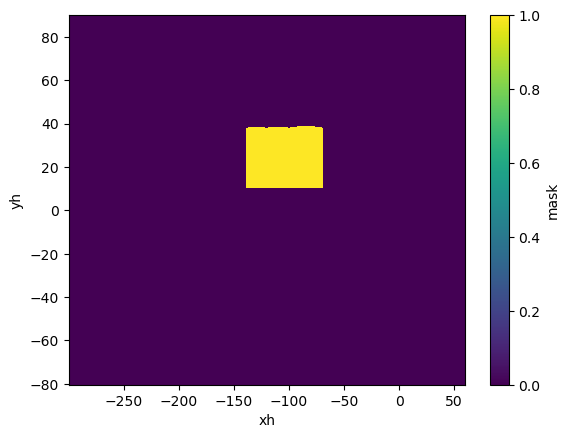

In [14]:
manso_region.mask.plot()

In [15]:
import warnings

lam = "heat"
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    wmb = xwmb.WaterMassBudget(
        grid,
        budgets_dict,
        manso_region.mask,
        assert_zero_transport=True
    )
    wmb.mass_budget(lam, greater_than=True, default_bins=True)
    #wmb.wmt.load()
    wmt = wmb.wmt
    

In [16]:
wmb.grid._ds

<xarray.Dataset>
Dimensions:                                                         (time: 59,
                                                                     rho2_l: 74,
                                                                     yh: 1080,
                                                                     xh: 1440,
                                                                     nv: 2,
                                                                     rho2_i: 75,
                                                                     yq: 1080,
                                                                     time_bounds: 60,
                                                                     xq: 1440,
                                                                     thetao_l_target: 440,
                                                                     thetao_i_target: 441)
Coordinates: (12/19)
  * nv                                                              (nv) float64 ...
  * rho2_i                                                          (rho2_i) float64 ...
  * rho2_l                                                          (rho2_l) float64 ...
  * time                                                            (time) object ...
  * xh                                                              (xh) float64 ...
  * yh                                                              (yh) float64 ...
    ...                                                              ...
    geolon                                                          (yh, xh) float32 ...
    geolat                                                          (yh, xh) float32 ...
    geolon_c                                                        (yq, xq) float32 ...
    geolat_c                                                        (yq, xq) float32 ...
  * thetao_l_target                                                 (thetao_l_target) float64 ...
  * thetao_i_target                                                 (thetao_i_target) float64 ...
Data variables: (12/81)
    S_advection_xy                                                  (time, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    average_DT                                                      (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1                                                      (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2                                                      (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds                                                       (time, nv) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    Sh_tendency_vert_remap                                          (time, rho2_l, yh, xh) float32 dask.array<chunksize=(1, 74, 270, 360), meta=np.ndarray>
    ...                                                              ...
    mass_density_bounds_greater_than                                (time_bounds, yh, xh, thetao_i_target) float32 dask.array<chunksize=(1, 270, 360, 441), meta=np.ndarray>
    mass_bounds_greater_than                                        (time_bounds, thetao_i_target) float32 dask.array<chunksize=(1, 441), meta=np.ndarray>
    mass_source_density                                             (time, yh, xh, thetao_l_target) float32 dask.array<chunksize=(1, 270, 360, 440), meta=np.ndarray>
    mass_source_density_greater_than                                (time, yh, xh, thetao_i_target) float32 dask.array<chunksize=(1, 270, 360, 441), meta=np.ndarray>
    mass_source_greater_than                                        (time, thetao_i_target) float32 dask.array<chunksize=(1, 441), meta=np.ndarray>
    mass_density                                                    (time, yh, xh, thetao_l_target) float32 dask.array<chunksize=(1, 270, 360, 440), meta=np.ndarray>
Attributes:
   

#### two cells below take a long time to run

In [ ]:
wmb_bounds_greater_than = wmb.grid._ds['mass_bounds_greater_than'].load()

In [ ]:
wmb_bounds_greater_than.plot()

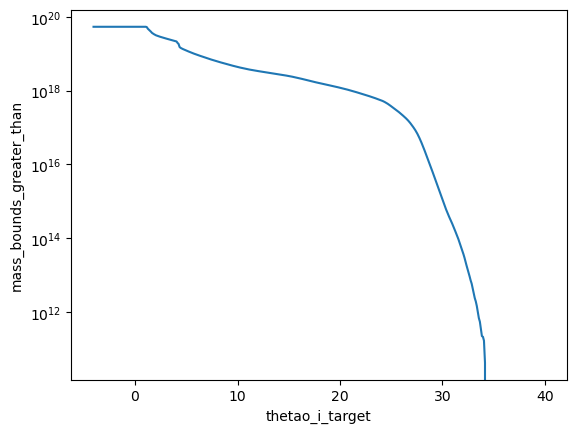

In [49]:
wmb_bounds_greater_than.mean('time_bounds').plot()
plt.yscale('log')

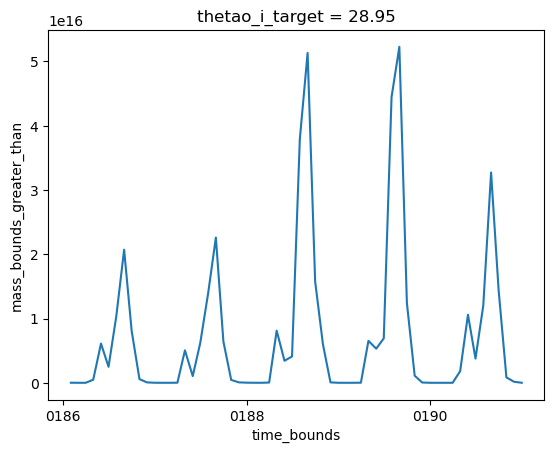

In [24]:
((wmb.grid._ds['mass_bounds_greater_than'])).sel(thetao_i_target=29, method='nearest').load().plot()

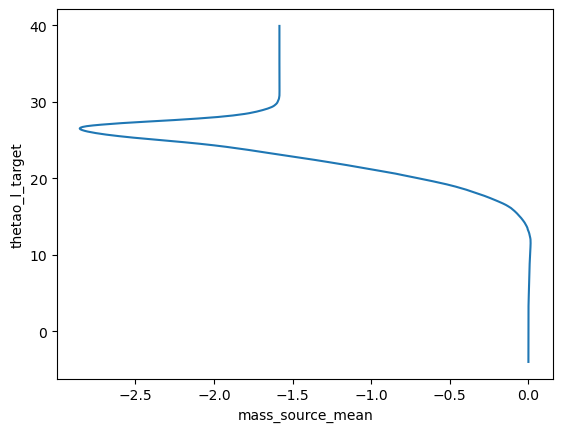

In [18]:
wmt_calc.mass_source_mean.plot(y='thetao_l_target')

In [23]:
wmt_calc

<xarray.Dataset>
Dimensions:                                    (time: 59, thetao_l_target: 440,
                                                thetao_i_target: 441,
                                                time_bounds: 60)
Coordinates:
  * time                                       (time) object 0186-02-15 00:00...
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-02-0...
Data variables: (12/24)
    surface_ocean_flux_advective_negative_rhs  (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    advection                                  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    diffusion                                  (time, thetao_l_target) float64 ...
    ...                                         ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...
    mass_bounds_less_than                      (time_bounds, thetao_i_target) float32 ...
    mass_tendency_mean                         (thetao_l_target) float64 ...
    mass_source_mean                           (thetao_l_target) float32 ...
    overturning_mean                           (thetao_l_target) float32 ...

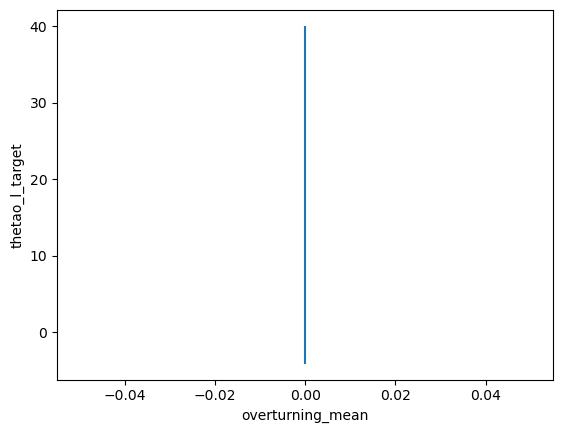

In [19]:
wmt_calc.overturning_mean.plot(y='thetao_l_target')

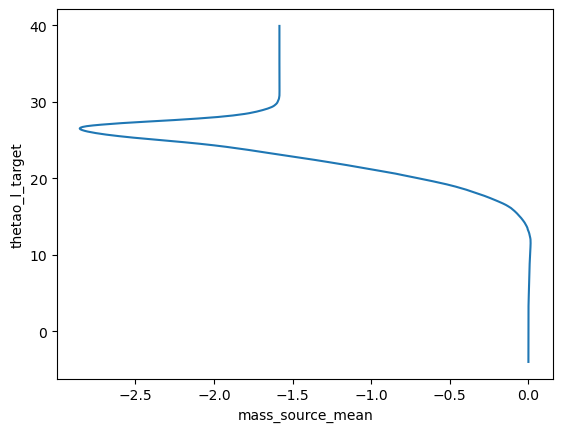

In [20]:
wmt_calc.mass_source_mean.plot(y='thetao_l_target')

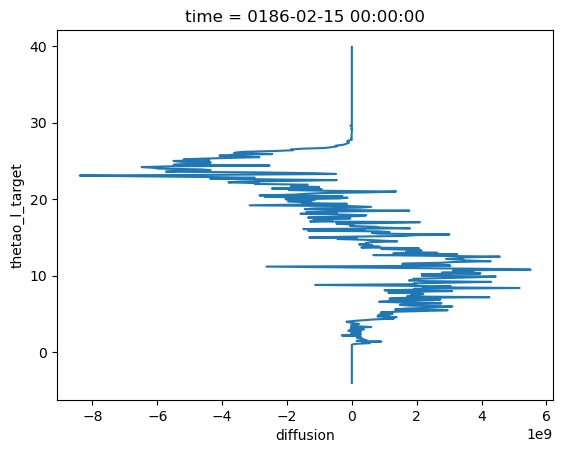

In [21]:
wmt_calc.diffusion.isel(time=0).compute().plot(y="thetao_l_target")

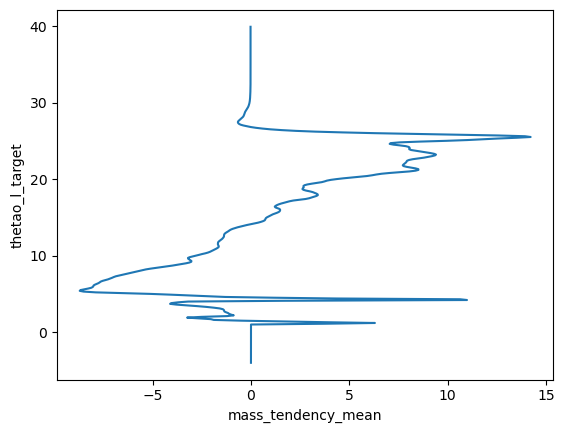

In [22]:
wmt_calc.mass_tendency_mean.plot(y="thetao_l_target")